### Use differential expressed (DE) miRNA/mRNA to get cohort-specific and disease relatated ceRNA axis from SCZ data

In [1]:
%load_ext autoreload

# Just download the github, and load the cernaxis into python path
# do
import sys
sys.path.append('../../')

# or install cernaxis by pip
#!pip install git+https://github.com/compbioclub/cernaxis.git@v1_as


from cernaxis.cernaxis import ceRNAxis

# initialize cernaxis object
cernaxis = ceRNAxis()

In [2]:
%autoreload

# Use DE miRNA/mRNA to get the ceRNA_axis

import pandas as pd

# use DE miRNA list as the strict criteria
deg_strict_df = pd.read_csv('../../demo/SCZ_DEG_RNA.csv', index_col=0)
print('deg_strict_df\n', deg_strict_df.head())
# use DE mRNA list as the loose criteria
deg_loose_df = pd.read_csv('../../demo/SCZ_DEG_mRNA.csv', index_col=0)
print('deg_loose_df\n', deg_loose_df.head())



deg_strict_df
                   type             gene    log2FC        pvalue          padj
hsa-miR-16-2-3p  miRNA  hsa-miR-16-2-3p -5.139793  2.640000e-13  4.020000e-10
hsa-miR-1306-3p  miRNA  hsa-miR-1306-3p -2.209798  3.320000e-11  1.690000e-08
hsa-miR-1307-3p  miRNA  hsa-miR-1307-3p -2.093602  2.960000e-11  1.690000e-08
hsa-miR-132-5p   miRNA   hsa-miR-132-5p -2.121375  5.510000e-09  1.680000e-06
hsa-miR-624-5p   miRNA   hsa-miR-624-5p  3.021188  3.580000e-08  9.100000e-06
deg_loose_df
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj  \
MPO      306.948587        2.216337  0.564877  3.923577  0.000087  0.002920   
DEPDC1    13.781165        2.521829  0.955832  2.638359  0.008331  0.072875   
DEPDC1B   35.058035        1.846581  0.528130  3.496453  0.000471  0.010010   
UTS2     166.152947        2.148164  0.747088  2.875383  0.004035  0.044262   
COL17A1   17.798800        2.779151  1.039143  2.674463  0.007485  0.067760   

            gene  type    lo

In [3]:
# Use strict DE miRNA to get the ceRNA_axis
ceRNA_df, axis_df = cernaxis.find_ceRNA_axis_by_DEG(deg_strict_df)
# store the filtered ceRNA network and ceRNA axis
ceRNA_df.to_csv('../../demo_out/SCZ_ceRNA_network.csv')
axis_df.to_csv('../../demo_out/SCZ_ceRNA_axis.csv')
ceRNA_df

/Users/chenlingxi/Library/CloudStorage/Dropbox/workspace/SCZ/ceRNAxis/docs/tutorial/../../cernaxis/cernaxis.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ceRNA_df['inference'] = 'strict'


miRNA        ceRNA       species  database        type  \
682758      hsa-miR-1278        CEBPB  Homo sapiens  RNAInter  miRNA-mRNA   
805405   hsa-miR-1306-3p      CEACAM6  Homo sapiens   miRWalk  miRNA-mRNA   
806911   hsa-miR-1306-3p         NEBL  Homo sapiens   miRWalk  miRNA-mRNA   
807351   hsa-miR-1306-3p     PPARGC1A  Homo sapiens   miRWalk  miRNA-mRNA   
812245   hsa-miR-1307-3p       ADAM32  Homo sapiens   miRWalk  miRNA-mRNA   
...                  ...          ...           ...       ...         ...   
6996766  hsa-miR-6855-5p        FSIP2  Homo sapiens   miRWalk  miRNA-mRNA   
6998598  hsa-miR-6855-5p       RNASE3  Homo sapiens   miRWalk  miRNA-mRNA   
6998710  hsa-miR-6855-5p        RWDD3  Homo sapiens   miRWalk  miRNA-mRNA   
6999339  hsa-miR-6855-5p  TLCD4-RWDD3  Homo sapiens   miRWalk  miRNA-mRNA   
6999841  hsa-miR-6855-5p       ZNF208  Homo sapiens   miRWalk  miRNA-mRNA   

         miRNA_log2FC  ceRNA_log2FC inference  
682758       2.011778     -7.399231    strict  
805405      -2.209798      2.820942    strict  
806911      -2.209798      2.529632    strict  
807351      -2.209798      3.927339    strict  
812245      -2.093602      3.126004    strict  
...               ...           ...       ...  
6996766     -2.456434      4.072671    strict  
6998598     -2.456434      2.428955    strict  
6998710     -2.456434      2.265765    strict  
6999339     -2.456434      3.067442    strict  
6999841     -2.456434      2.872955    strict  

[93 rows x 8 columns]

In [4]:
# Use strict DE miRNA and loose DE mRNA to get the final ceRNA_axis
loose_axis_df = cernaxis.expand_ceRNA_axis_by_loose_DEG(deg_strict_df, deg_loose_df)
# store the final ceRNA axis
loose_axis_df.to_csv('../../demo_out/SCZ_ceRNA_loose_axis.csv')
# output the final ceRNA axis
loose_axis_df

miRNA        ceRNA       species        database  \
1775644  hsa-miR-3064-5p      ARHGAP8  Homo sapiens         miRWalk   
1775806  hsa-miR-3064-5p       BCL2A1  Homo sapiens         miRWalk   
1775833  hsa-miR-3064-5p        BIRC5  Homo sapiens         miRWalk   
1775877  hsa-miR-3064-5p        BTNL3  Homo sapiens         miRWalk   
1776086  hsa-miR-3064-5p       CCDC80  Homo sapiens  TargetSCAN_8.0   
...                  ...          ...           ...             ...   
4495205   hsa-miR-485-5p  TLCD4-RWDD3  Homo sapiens         miRWalk   
4495575   hsa-miR-485-5p        UNC5B  Homo sapiens  TargetSCAN_8.0   
4495619   hsa-miR-485-5p         UTS2  Homo sapiens         miRWalk   
4495817   hsa-miR-485-5p        ZFP30  Homo sapiens         miRWalk   
4495936   hsa-miR-485-5p       ZNF441  Homo sapiens         miRWalk   

               type  miRNA_log2FC  ceRNA_log2FC inference  
1775644  miRNA-mRNA     -2.123515      5.218091     loose  
1775806  miRNA-mRNA     -2.123515      1.586707     loose  
1775833  miRNA-mRNA     -2.123515      1.762193     loose  
1775877  miRNA-mRNA     -2.123515      4.612546     loose  
1776086  miRNA-mRNA     -2.123515      5.326842     loose  
...             ...           ...           ...       ...  
4495205  miRNA-mRNA     -3.818348      3.067442     loose  
4495575  miRNA-mRNA     -3.818348      1.507402     loose  
4495619  miRNA-mRNA     -3.818348      2.148164     loose  
4495817  miRNA-mRNA     -3.818348      1.746945     loose  
4495936  miRNA-mRNA     -3.818348      1.650988     loose  

[118 rows x 8 columns]

Compared with DLRAPom detected ceRNA axes

Interactions detected by both tools: hsa-miR-485-5p|PPARGC1A


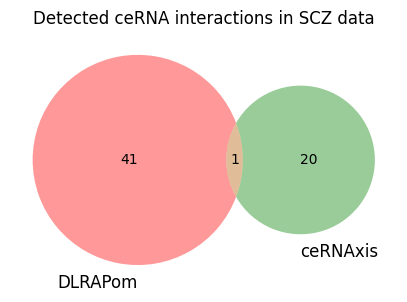

In [5]:

import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt

df1 = pd.read_csv('../../demo_out/SCZ_DLRAPom_miRNA_mRNA.csv', index_col=0)[['mirnaid', 'genesymbol']].drop_duplicates()
df1.columns = ['miRNA', 'ceRNA']
df1['type'] = 'miRNA-mRNA'
df2 = pd.read_csv('../../demo_out/SCZ_DLRAPom_miRNA_lncRNA.csv', index_col=0)[['miRNAname', 'geneName']].drop_duplicates()
df2.columns = ['miRNA', 'ceRNA']
df2['type'] = 'miRNA-lncRNA'
df = pd.concat([df1, df2])
df['Tool'] = 'DLRAPom'
df3 = axis_df[['miRNA', 'ceRNA', 'type']].drop_duplicates()
df3['Tool'] = 'ceRNAxis'
df = pd.concat([df, df3])
df

summary = (
    df
    .drop_duplicates(['miRNA','ceRNA','type','Tool'])
    .groupby('Tool')
    .size()
    .reset_index(name='# of interactions')
)

tools = summary['Tool'].tolist()
sets = {
    tool: set(df[df.Tool==tool].apply(lambda r: f"{r.miRNA}|{r.ceRNA}", axis=1))
    for tool in tools
}


label_I = "\n".join(sorted(sets['DLRAPom'] & sets['ceRNAxis']))
print('Interactions detected by both tools:', label_I)

from matplotlib_venn import venn2
A, B = tools
fig = plt.figure(figsize=(5,5))
v = venn2([sets[A], sets[B]], set_labels=[A, B])

plt.title('Detected ceRNA interactions in SCZ data')
plt.show()
fig.savefig('../../demo_out/SCZ_venn.pdf', format='pdf')
